#Manually annotating 50,000 tokens for risk factor expressions, and using them for training a logistic regression model built on word2vec features

Our approach to the task *"What do we know about COVID-19 risk factors?"* was to train a supervised machine learning model to recognise language expressions that are used in the scientific papers in the data set to express risk factors for diseases in general. If we apply this model to papers on the topic of Covid-19, it should hopefully be able to detect paragraphs that talk about risk factors for Covid-19.

For training our supervised model, we used the machine learning and text mining libraries [scikit-learn](https://scikit-learn.org/stable/index.html) and [gensim](https://radimrehurek.com/gensim/). For selecting data to annotate and for carrying out the annotations, we used two different tools developed and maintained within the [Språkbanken Sam](http://www.sprakbanken.se/eng) infrastructure. Språkbanken Sam is a part of a Swedish national e-infrastructure that supports NLP-based research.

We believe that our contribution might be valuable to the Covid-19 text mining community by taking an approach that is different from most other submissions in two respects: i) It focuses on learning the language that is used for expressing that something is a risk factors, which makes it less likely to be biased towards risk factors that are already known, ii) it uses a supervised machine learning approach trained on manually annotated data. We don't claim this method to be better, but rather that by approaching the problem in a manner that differs from other approaches, we are likely to have contributed with a method that is suitable to combine with many of the other submissions to the task. We this potential to combine our approach with other contributions, and thereby improve them, is likely to be our most important contribution to the community.

##Selecting data for manual annotation

In order to train a supervised machine learning model, annotated data is needed. We, therefore, used the following approach for selecting data from the Cord-19 corpus to manually annotate:

1. We constructed a list of the words (or sometimes bi- and tri-grams) in the *"What do we know about COVID-19 risk factors?"* call that we estimated would be likely trigger-words for more general text about risk factors. These included, for instance, "risk factors", "factors", "co-infections", "co-morbidities", "high-risk", "pre-existing", "susceptibility of". (But we did not include such words as "pulmonary disease", "pregnant", or "smoking", as they are too specific.)
2. We, thereafter, expanded our list of trigger words by generating synonyms to them, using the [Gavagai living lexicon](https://lexicon.gavagai.se/lookup/). 
3. We then counted the occurrence of the words in the CORD-19 corpus. Words that occurred very often, e.g. "factors", where then specified further with bigrams. For instance, "factors" was removed as a trigger word and "socio-economic factors",  "behavioral factors", "environmental factors" and "genetic factors" were added.
4. We then read some of the paragraphs in the CORD-19 corpus that contained these trigger words, in the search for new general trigger words, and found words such as "more common among" and "more likely", which we also added to our list.

This four-step approach resulted in a list of [104 words for risk factors](https://www.kaggle.com/mariaskeppstedt/trigger-words).

We then limited the search in the CORD-19 corpus to articles indexed in PubMed, and retrieved all paragraphs containing any of the 104 risk factor words. This resulted in that 30,000 paragraphs were found. That is, much more text than what would be possible for us to manually annotate. We, therefore, needed to further limit the number of paragraphs to select for manual annotation. 

We needed a method that would filter out texts in which it was likely that these trigger-words were used for talking about risk factors for diseases.  Given our limited amount of time available for manual annotation, it also seems sensible to focus on annotating the kinds of texts that are often re-occurring in the CORD-19 corpus, rather than to try to also capture outliers. Finding re-occurring content, and creating automatic classes in this content, can be done in an unsupervised fashion, for instance by using topic modelling.

We therefore applied a graphical topic modelling tool that is called Topics2Themes on our corpus of 30,000 CORD-19 paragraphs. Topics2Themes is an [open-source](https://github.com/mariask2/topics2themes/) tool that is maintained and developed within the [Språkbanken Sam](http://www.sprakbanken.se/eng) infrastructure. We instructed the Topics2Themes to try to find 20 topics in the data set, but to run the topic modelling algorithm 50 times and only retain the topics that were stable enough to occur in all re-runs. This resulted in that nine stable topics were found, as shown in the middle panel in the screen shot of the tool below (the topics panel). The left-most panel shows the terms associated with each topic, and the right-most panel shows the texts that are associated with the topics. In the screen shot, the topic "Results of studies of co-morbidities and other risk factors" have been selected by the tool user, and the tool thereby shows the terms and texts most closely associated with this topic in the surrounding panels.

For each of the nine topics, we read the 15 most closely associated texts, and classified them according to if they contained a mention of a risk factor for a disease or not. The labelling functionality of the tool, i.e., the label in the top, right-hand side of each text was used for this classification. A green label (Me) shows that the text has been classified as describing a risk factor for a disease, whereas a yellow label (No) shows that the text has been classified as not describing a risk factor. For five of these nine automatically extracted topics, more than one of the top-ten texts associated with the topics described a risk factor for a disease. These were the five topics: "Results of studies of co-morbidities and other risk factors", "Causes of respiratory tract infections in children, and whether such previous infections influence the development of asthma", "Mostly texts related to antibodies and immunity", "Risk factors for influenza, symptoms for influenza, factors influencing whether people vaccinate or not", and "Typical reports of common co-infections and how usual these are, and sometimes, also studies of whether they effect severity". For these five topics, more texts associated with them were manually classified (around 70 more texts for each topic).

Among texts classified as containing a risk factor for a disease, we also included texts which stated that something was NOT a risk factor for a disease. E.g., as in the second part of the sentence "[...] only age was associated with this outcome,  whereas the presence of comorbidities I was I not."

The classification of texts in Topics2Themes resulted in a total of 419 manually classified texts, of which 150 were manually classified as describing risk factors for diseases.

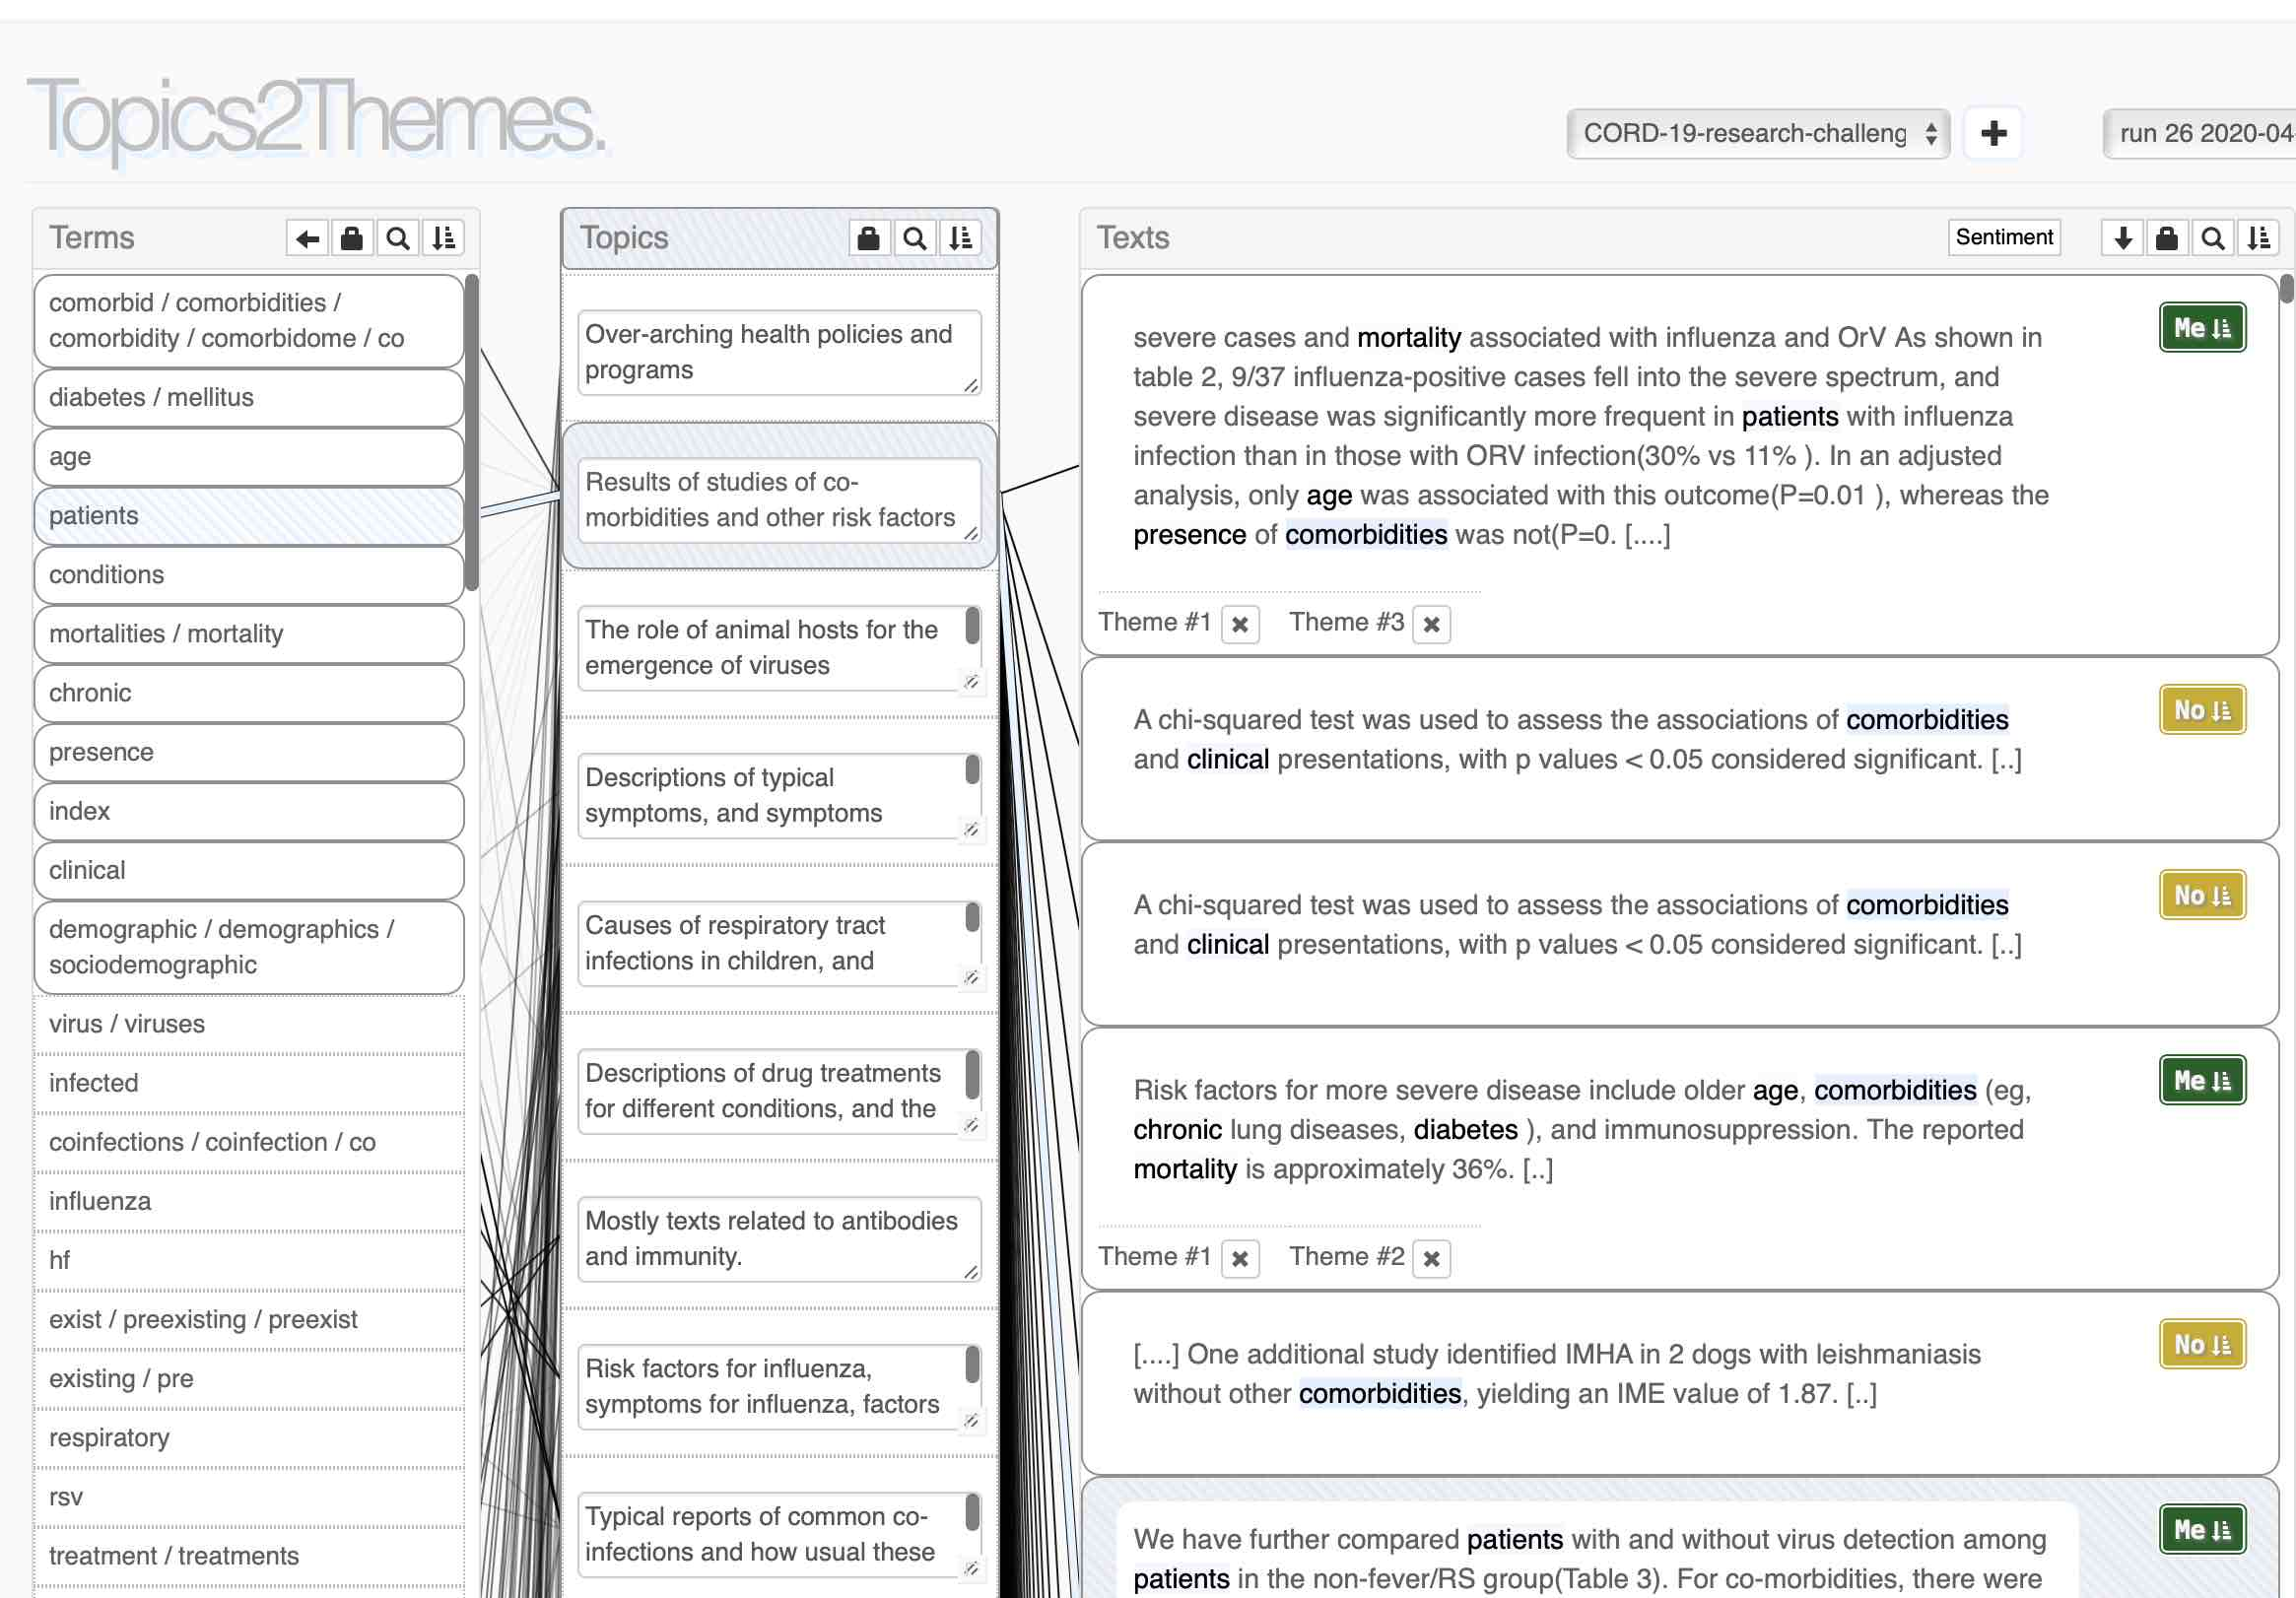


There is, of course, a risk that our approach of selecting data though extending a list of key words, might have resulted in a slightly biased data set. If we have the time for it in the near future, we plan to construct a small evaluation set, with expressions for risk factors. We will then use another approach for harvesting data, in order to determine if the approach used here have been biased. We might, for instance, use keywords in article headings or MeSH codes to retrieve articles relevant for risk factors, and thereafter annotate the entire articles for risk factor-triggers. 

## Manual annotation of risk factor triggers
As described above, our approach for the task was to learn to detect the language used for expressing risk factors, i.e., expressions that we call "risk factor triggers". For the 150 paragraphs which we, with the Topics2Themes tool, had classified as describing risk factors for diseases, we therefore performed an additional round of annotations. These annotations consisted of marking "risk factor triggers", i.e. the spans of texts that were used by the article authors to indicate that something is a risk factor for a disease. 

For the annotations, we used a web-based annotation tool for marking spans of text, which also has been developed within the [Språkbanken Sam](http://www.sprakbanken.se/eng) infrastructure. In the screen-shot below, four annotations of risk factor triggers are shown. 

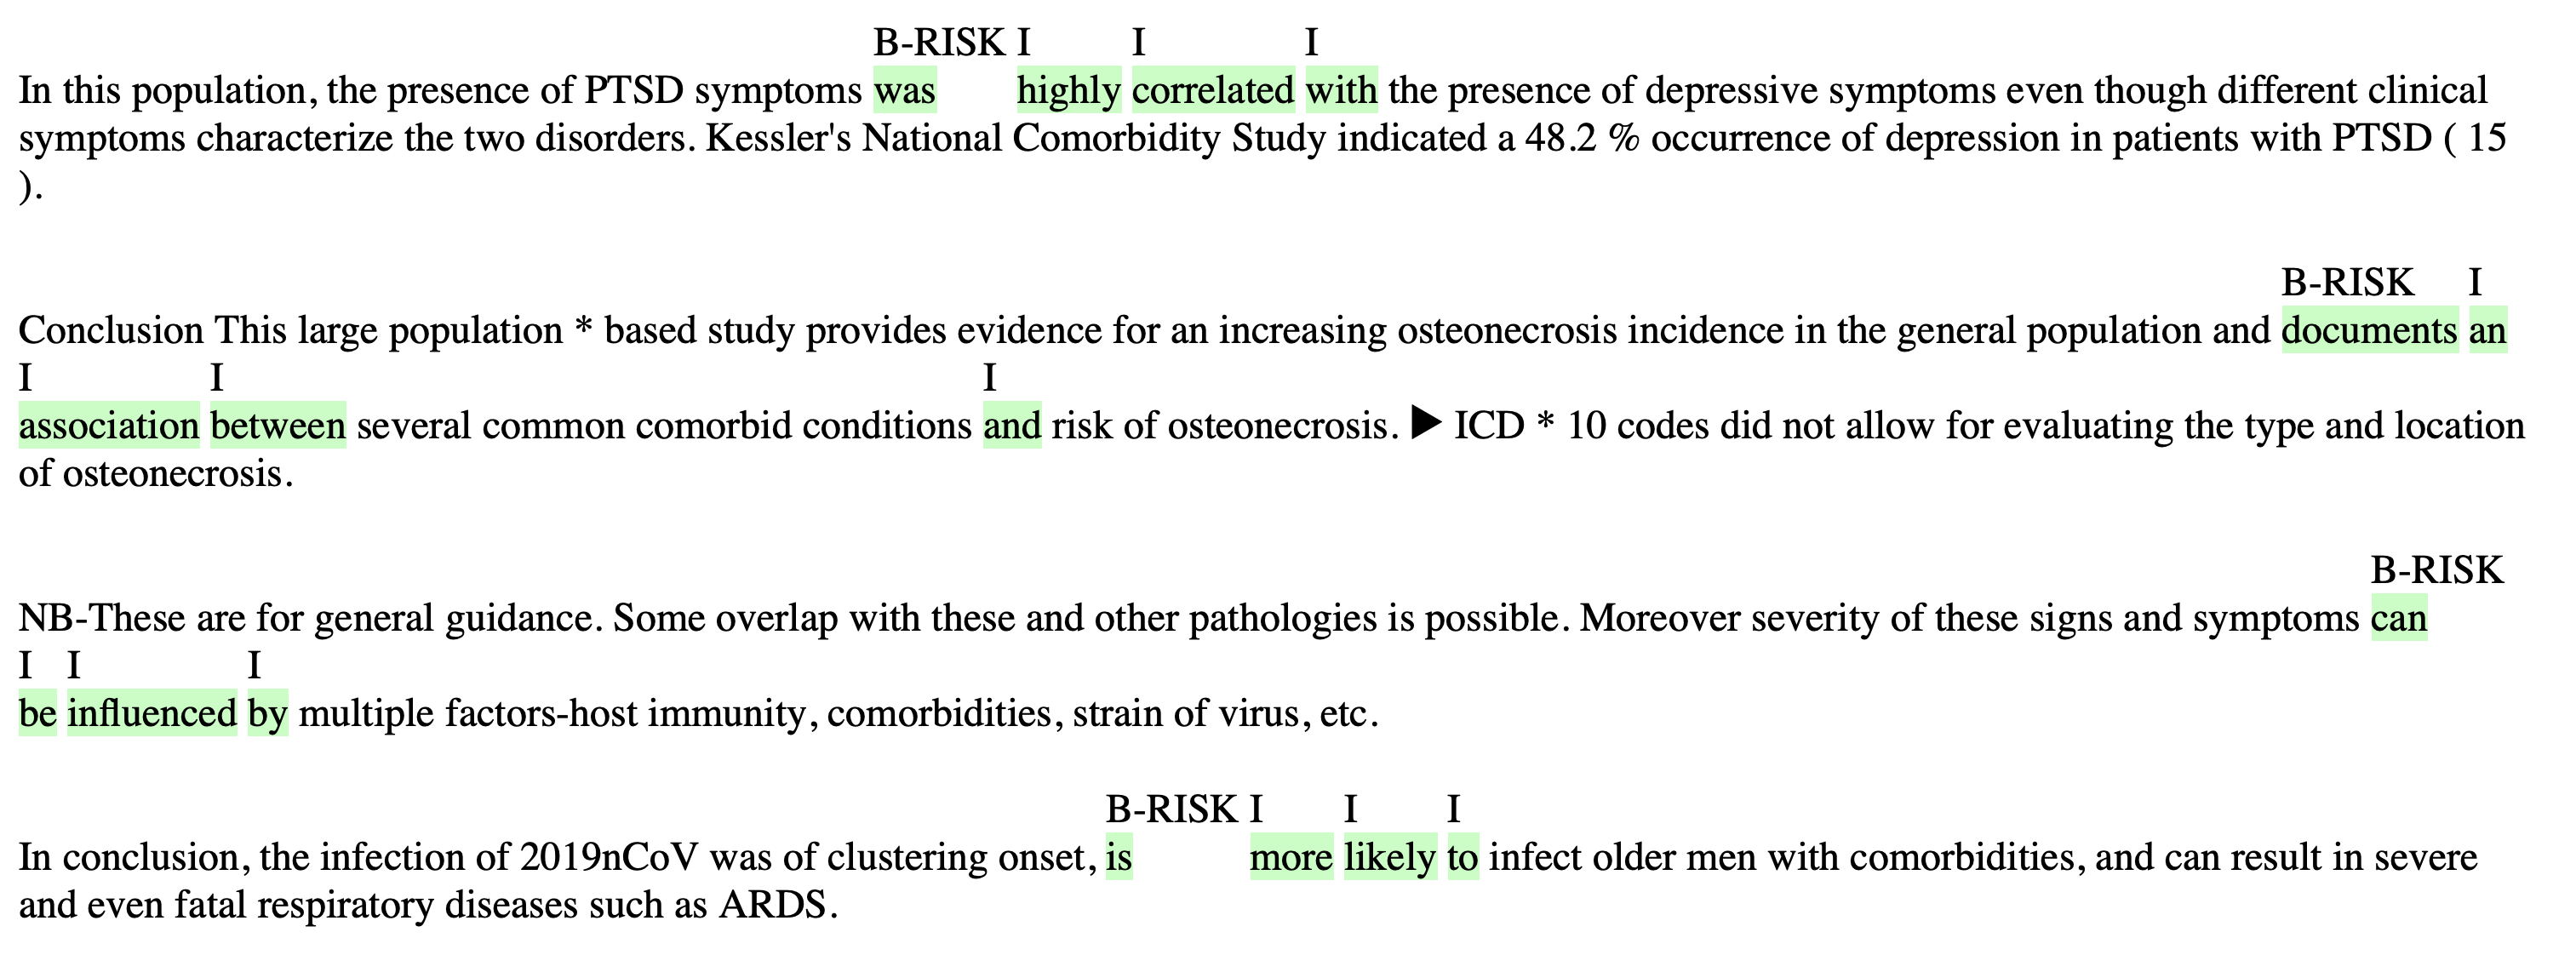

We also annotated triggers for the opposite, i.e. language triggers that indicate that something is NOT a risk factor, with another tag:

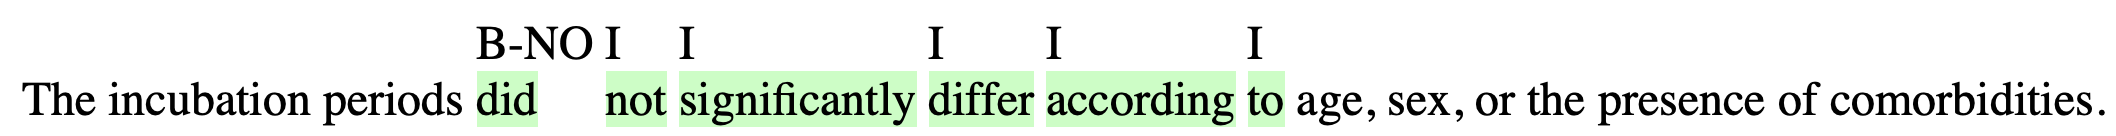

This second round of annotation took a little more than three hours to carry out.

It should be noted that we did not have any medical knowledge that could guide us in performing the annotations. It would, of course, have been preferable with a medically trained annotator. The annotations are, however, provided [here](https://www.kaggle.com/mariaskeppstedt/manually-annotated-risk-factor-expressions#manually_annotated_data.txt), and could be further improved by an annotator with medical training.

## Training a supervised machine learning model

Once data with risk factor-triggers was annotated, it could be used for training a supervised model to detect the triggers. We collapsed the two annotated categories ("trigger words for something being a risk factor" and "trigger words for something NOT being a risk factor"), into one category, i.e. the "risk factor trigger" category.

As there were only 150 paragraphs in the training data that contained risk factors, we believe that the best approach to detect the triggers is a type of machine learning model that works well also when the training data is scarce. We chose a *logistic regression* model, as it outputs a confidence measure that is easily interpretable. We applied the model on a token level, i.e. the task of the model was to decide whether a token was part of a risk factor-trigger or not. The logistic regressions model returns a probability score, between 0 and 1, for a token being a risk factor-trigger.

As features for the model, we used the token that is to be classified. For instance, if the word "risk" is often annotated as a part of a risk factor-trigger, we would like the model to learn to classify "risk" as a risk factor-trigger. However, also the context of the word is important. If the word "risk" appears in the context of "factor" it is much more likely to be a risk factor-trigger, than if it occurs in the context of, let's say, "analysis". We, therefore, want the model to also take the context into account. We do not want the context to be too precise though. Let's say that the training data contains the sentence "Diabetes is a risk factor for ..", then we do not want the model to learn that specifically "diabetes" is a likely context, but it should also be able to detect that something similar to "diabetes" is a likely context, i.e. "obesity" in "Obesity is a risk factor for ..". 

As representations for the context words, we therefore used semantic vectors that represent the context. As "diabetes" and "obesity" are semantically similar, they will be represented by semantic vectors that are similar. We use vectors from a word2vec model pre-trained on 27 million biomedical articles. (From https://github.com/RaRe-Technologies/gensim-data/issues/28, see more below.)
When constructing the features, we also use the semantic vector for the token that is to be classified.

When applying the trained model for classifying text, we extract the highest confidence-value for each paragraph, i.e. the token that the model classifies as most likely to be a risk factor-trigger. This value is used for signalling the likelihood that a paragraph describes risk factors for diseases. 

(An alternative here, would be to use a structured predictor, for instance a conditional random fields model, in which each token training and classification takes into account how the surrounding tokens are classified.  However, our guess here is that it would make little difference, as we use word-vectors for the surrounding tokens as features and only take the confidence value of the most confident token into account. But it is only a guess.)

## Libraries and classes used 
For training and using a logistic regression model, the [LogisticRegressionCV class from the scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) was used.

For handling the pre-trained word2vec-vectors, [the Gensim library ](https://radimrehurek.com/gensim/auto_examples/index.html) was used.

The feature vectors were constructed and concatenated using Numpy, and the TweetTokenizer class was used for tokenising the Cord-19 texts that were to be classified. (There is probably a more suitable tokeniser, but the TweetTokenizer is likely to work reasonably well here.) 


In [ ]:
from gensim.models import KeyedVectors
from sklearn.linear_model import LogisticRegressionCV
from nltk.tokenize import TweetTokenizer
from joblib import dump, load
import glob
import json
import csv
import os
import os.path
import numpy as np

## Basic configuration

These variables can be changed, if the model is to be run with another configuration, e.g. another window size for what neighbouring tokens to feed as features to the classifier.

In [ ]:
# Basic variables and configuration

# The tokens in the training data file can be of two categories, 
# either inside a risk factor-trigger (I) or not (O)

INSIDE_LABEL = "I"
OUTSIDE_LABEL = "O"

# When training the model to classify a token, 
# use features in the form of word2vec vectors representing the five preceeding 
# and the five words following the token.
# The vectors are concatenated into one long vector

WINDOW_SIZE = 5

# Length of the vectors in the pre-trained word2vec model
VECTOR_LENGTH = 200

# For the current token, a vector consisting of 
# the one-hot encoding of this vector used.
# Only tokens that occur at least twice in the training data, 
# receives a position in 
# the one-hot encoding vector.
# Tokens occurring only once are disregarded, and the classifier has to rely the 
# word2vec representation vector for this token.
# This is to done to limit the features that are learned from, 
# given the small amount of training data available.

FREQUENCY_CUT_OFF = 2

# If a word is not found in the word2vec model, it receives a 
# default vector representation, only consisting of 0:s.

default_vector = np.array([0.0] * VECTOR_LENGTH)

# If TEST_RUN is set to True, the code is run with only a small portion of the data. 
# This is only to be used for test and debugging

TEST_RUN = False 


## Two help functions for reading from the file with manually annotated data
The main output is two equally long lists containing: (i) The annotated tokens, (ii ) with what category the token was annotated.

Another output is a list of tokens that have been annotated as inside a risk factor at least twice.

In [ ]:
## As input parameter the function takes the name of the file
## with the annotated data
## The file has the following format, with one token on each line, 
## and the manual annotation separated by tab
## 
## Risk    B-RISK
## factors    I
## for    I
## more    
## severe    O
## disease    
##
## The OUTSIDE class can either be represented by O or by no annotation.

## There are three different annotated classes in the file, 
## plus the OUTSIDE_LABEL class.
## Collapse the three annotated classes into one class, the INSIDE_LABEL class

## Also, make a list of all tokens that have been annotated at least twice
## as being a inside a risk factor-trigger

def read_data(file_name):
    words = []
    classifications = []
    feature_dict = {}
    with open(file_name) as f:
        for line in f:
            data = OUTSIDE_LABEL
            word = ""
            if line.strip() != "":
                sp = line.split("\t")
                word = sp[0].strip()
                if len(sp) > 1 and sp[2].strip() != "" \
                and sp[2].strip() != OUTSIDE_LABEL:
                    data = INSIDE_LABEL
            words.append(word)
            classifications.append(data)
            if data == INSIDE_LABEL:
                if word in feature_dict:
                    feature_dict[word] = feature_dict[word] + 1
                else:
                    feature_dict[word] = 1
                
            
    feature_list = \
    [word for word, freq in feature_dict.items() \
     if freq >= FREQUENCY_CUT_OFF]
    return words, classifications, feature_list
        

# Just converts OUTSIDE_LABEL to 0 and INSIDE_LABEL TO 1
def get_training_labels_vec(training_labels):
    labels = []
    for label in training_labels:
        if label == OUTSIDE_LABEL:
            labels.append(0)
        else:
            labels.append(1)
    return labels



    



## Transforming text data into vectors 

In [ ]:
# If the word is in the pre-trained word2vec model, return its vector.
# Otherwise, return the default vector
def get_vector_for_word(word, word2vec_model):
    if word in word2vec_model:
        vector = word2vec_model[word]
    else:
        vector = default_vector
    return vector

## For a list of tokens, return a matrix with the same number of tokens 
## as words in the input list.
## That is, the row is the feature vector representing the token. 
def get_vectors(words, word2vec_model, feature_list):
    return_vectors = []
    for i in range(0, len(words)):
        word = words[i]
        
        # The word2vec vector for the current word
        vector = get_vector_for_word(word, word2vec_model)
        
        # The one-hot encoding for the current word (if it is included in the list
        # of featurs that occur at least twice, otherwise, use vector of 0:s)
        one_hot_encoding_vector = len(feature_list)*[0.0]
        if word in feature_list:
            index_of_word = feature_list.index(word)
            one_hot_encoding_vector[index_of_word] = 1.0
        vector = np.concatenate((vector, one_hot_encoding_vector))
        
        # For each of the WINDOW_SIZE tokens before the current token and each of
        # the WINDOW_SIZE tokens after the current token, 
        # concatenate the word2vec vector of the token to the feature vector
        for j in range(1, WINDOW_SIZE+1):
            before_index = i - j
            after_index = i -j
            # If the token is in the end or beginning of the paragraph, use the 
            # default vector as context vector
            before_vector = default_vector 
            after_vector = default_vector
            if before_index >= 0:
                before_vector = \
                get_vector_for_word(words[before_index], word2vec_model)
            if after_index >= len(words):
                after_vector = \
                get_vector_for_word(words[after_index], word2vec_model)
            vector = np.concatenate((vector, before_vector))
            vector = np.concatenate((vector, after_vector))
        
        return_vectors.append(vector)
    np_return_vectors = np.array([np.array(ti) for ti in return_vectors])
    return np_return_vectors

## Training the logistic regression model

The corpus of around 50,000 manually annotated tokens from the CORD-19-research-challenge was used as training data.

These annotations were transformed into features (using the help-functionality above) and used for training a logistic regression model.

A pre-trained word2vec model is first loaded, to be used as features. This model can be found [here](https://github.com/RaRe-Technologies/gensim-data/issues/28).


In [ ]:
# Load the word2vec model
# The word2vec model can be found from
# https://github.com/RaRe-Technologies/gensim-data/issues/28
print("Starting to load the word2vec model")


word2vec_model = {}
WORD2VECPATH = '../input/word2vecmodels/pubmed2018_w2v_200D.bin'
if TEST_RUN: # Only load a subset of the model when in debugging mode.
    word2vec_model = \
    KeyedVectors.load_word2vec_format(WORD2VECPATH, binary=True,\
                                          limit=5000)
else:
    word2vec_model = \
    KeyedVectors.load_word2vec_format(WORD2VECPATH, binary=True)

clf = None
feature_list = None

# The trained models, and feature list, are saved here:
model_file_name = 'risk_mention_model.joblib'
feature_list_file_name = 'risk_mention_features.joblib'

# To save time, when you only want to use the models and
# not retrain them, it is also possible to manually upload the trained 
# models into the input data.
# The code checks if these models exist among the input data, and if that
# is the case, they are not retrained. Therefore, if you want to re-train the
# model, and have uploaded the files in the input data, you need to 
# remove them from there
saved_model_path = os.path.join("../input/models", model_file_name)
feature_list_path = os.path.join("../input/models", feature_list_file_name)

# If no model has been trained, 
# and manually added to input files, train a new model:
if not os.path.isfile(saved_model_path) or not os.path.isfile(feature_list_path):
    
    ANNOTATED_DATA_PATH = \
    "../input/manually-annotated-risk-factor-expressions/manually_annotated_data.txt"
    training_data, training_labels, feature_list = \
    read_data(ANNOTATED_DATA_PATH)
    
    print("Features used in the one-hot encoding vector " + str(feature_list))
    
    print("Starts transforming the text into feature vectors")
    y = get_training_labels_vec(training_labels)
    X = get_vectors(training_data, word2vec_model, feature_list)
    
    if TEST_RUN: # For test and debugging, only use a small part of the data
        y = y[:10000]
        X = X[:10000]
        
    print("Starts training the model")
    clf = \
        LogisticRegressionCV(random_state=0, \
                             max_iter=10000, \
                             cv=2, \
                             n_jobs=8).fit(X, y)

    dump(clf, model_file_name)
    print("Write created model to: " + model_file_name)
    
    dump(feature_list, feature_list_file_name)
    print("Write feature list to: " + feature_list_file_name)

        

## Use the trained model to find relevant articles in the CORD-19 data set

All paragraphs in the cord-19-research-challenge that are included in a paper that contains the words "covid", "coronavirus", disease 2019", "sars-cov-2" or "2019-nCoV" is then run through the model. 

Papers which have at least one paragraph included in the test data set are excluded. Paragraphs under headings with names such as "introduction" and "background" are also excluded, as these texts might be more likely to contain information on previous research.

The 50 paragraphs that get the highest score for risk factor mentions is then returned (together with their score and paper id).

In [ ]:
# If a previously trained model is used, load this model
if clf == None or feature_list == None:
    print("Starts loading a previously trained model")
    clf = load(saved_model_path)
    feature_list = load(feature_list_path)
    
CONTENT_DIR = "/kaggle/input/CORD-19-research-challenge/"

# Exclude papers from the data sets, for which text parts have been annotated
ids_to_exclude = set()
with open("../input/manually-annotated-risk-factor-expressions/id_of_annotated_files.txt") as f:
    for line in f:
        ids_to_exclude.add(line.strip())

# Exclude text under headings with the name of introduction or background, for instance, 
# as they are likely to refer to old studies, 
# rather than being new ones. 
headings_to_exclude_set = set()
with open("../input/headings/headings_to_exclude.txt") as f:
    for line in f:
        headings_to_exclude_set.add(line.strip())

# To tokenise the texts in the Cord-19 set
tknzr = TweetTokenizer(preserve_case=True)

# A list that is updated with information as new papers are classified with
# the model. When all papapers have been processed, the list
# contains information on the 50 paragraphs that are
# most likely to contain expressions for risk factors
prediction_scores = [(0.0, "EMPTY", "EMPTY", "EMPTY")]*50 

# Run on the four directories of Cord-19
for dir_name in ["biorxiv_medrxiv", "comm_use_subset",\
                 "custom_license", "noncomm_use_subset"]:
    path = os.path.join(CONTENT_DIR, dir_name, dir_name, "pdf_json")
    
    # All files in the directory
    files = glob.glob(path + "/*.json")
    
    
    paragraphs_read_so_far = 0
    
    if TEST_RUN: # Only use the first 100 files if it is a test run
        files = files[:100]
    
    print("Found " + str(len(files)) + " files in " + dir_name)
    
    nr_of_papers_on_covid_19 = 0
    
    for file in files:
        with open(file) as f:
            file_texts = []
            data = json.load(f)
            paper_id = data["paper_id"].strip()
            
            # Exclude papers that are included in training data
            if paper_id in ids_to_exclude: 
                continue
            
            # Default is that the paper is not about covid-19
            is_paper_about_covid_19 = False
                  
            # Loop through all paragraphs in the article
            for el in data["body_text"]:
                text = el["text"]
                
                # Check if paper contains covid-19 information
                # by checking if it contains any of four
                # covid-19-relevant key word
                if not is_paper_about_covid_19:
                    for covid_trigger in \
                    ["covid", "coronavirusdisease",\
                     "sars-cov-2", "2019-ncov"]:
                        if covid_trigger in text.lower().replace(" ", ""):
                            is_paper_about_covid_19 = True
               
                # Add all paragraphs that not to be excluded
                if el["section"].lower() not in headings_to_exclude_set:
                    file_texts.append(text)

            # If the article is about covid-19
            if is_paper_about_covid_19:
                nr_of_papers_on_covid_19 = nr_of_papers_on_covid_19 + 1
                
                # Add lists of tokens in eah paragraph to paragraph_token_list
                paragraph_token_list = []
                for text in file_texts:
                    tokens = tknzr.tokenize(text)
                    paragraph_token_list.append(tokens)
               
                # For each paragraph, transform the token-list
                # into features, and run it through the
                # machine learning model
                for paragraph in paragraph_token_list:
                    # Get feature vector for each token in the paragraph
                    X = get_vectors(paragraph, word2vec_model, feature_list)
                    
                    # Get predictions
                    predictions = clf.predict(X)
                    # Get probabilites for predicions
                    prediction_prob = clf.predict_proba(X)
                    
                    # If at least one token in a paragraph has been 
                    # classified as a risk factor-trigger
                    if 1 in predictions: 
                        # Loop through each prediction (for each token)
                        # in the paragraph
                        for nr, (predicted_prob, predicted) \
                            in enumerate(zip(prediction_prob, predictions)):
                            
                            # If the token is classified as a risk factor trigger
                            if predicted == 1: 
                                
                                # Determine indexes for neighbouring tokens 
                                # for the current token.
                                # (To be able to present the neighbours
                                # to a token that are part of constructing 
                                # the feature vector.)
                                left_window_index = nr - WINDOW_SIZE + 1
                                right_window_index = nr + WINDOW_SIZE + 1
                                if left_window_index < 0:
                                    left_window_index = 0
                                if right_window_index >= len(paragraph):
                                    left_window_index = len(paragraph) - 1
                                    
                                # For the list of the 50 tokens 
                                # that are most likely to 
                                # be classified as a 
                                # risk factor-trigger:
                                # If the probability for 
                                # the current token being
                                # a risk factor trigger 
                                # is higher than the classification 
                                # with the lowest probability in the list:
                                # Add the current token to the list 
                                # of the 50 most probable
                                # risk factor triggers
                                least_confident_prediction_among_top_N = \
                                prediction_scores[-1][0]
                                prob_for_token_being_a_trigger = \
                                np.amax(predicted_prob)
                                if prob_for_token_being_a_trigger > \
                                    least_confident_prediction_among_top_N:
                                    prediction_scores.append(\
                                        (prob_for_token_being_a_trigger, \
                                        " ".join(paragraph), \
                                         " ".join(paragraph[left_window_index:\
                                                            right_window_index]), \
                                         paper_id))
                                    
                                    # Sort the top-50 list, and remove the 
                                    # least probable classification
                                    prediction_scores.sort(reverse=True)
                                    prediction_scores = prediction_scores[:-1]
                                
                    paragraphs_read_so_far = paragraphs_read_so_far + 1
                    if paragraphs_read_so_far % 1000 == 0:
                        print("Read and classified " \
                              + str(paragraphs_read_so_far) + \
                              " paragraphs.")
                        
    print("Found " + str(nr_of_papers_on_covid_19) + \
          " papers on covid-19 in "\
          + dir_name)

# Print results to console and to "top_papers.html"
with open("top_papers.html", "w") as f:
    paper_id_dict = {}
    
    for (score, text, window_text, paper_id) in prediction_scores:
        if paper_id not in paper_id_dict:
            paper_id_dict[paper_id] = []
        paper_id_dict[paper_id].append((score, text, window_text))
        
    for key, item_list in paper_id_dict.items():
        for (score, text, window_text) in item_list:
            print("Logistic regression model score: " \
                  + str(round(score, 2)))
            print("Expression that was found: " \
                  + str(window_text))
            f.write("<div>" + str(round(score, 2)) \
                    + "</div>")
            f.write("<p> " + text.replace(window_text, "<i>"\
                    + window_text + "</i>") + " </p>")
            
        print("Paper id: " + str(key))
        print()
            
        f.write("<br>")

The 50 papers that are most likely to contain mentions of risk factors, according to the model trained, are listed in the output file "top_papers.html". 

The expressions leading to this classification are also printed to the console.




